분류 성능비교
==

다루는 내용
--
- 정적 성능평가 Confusion matrix  
- 동적 성능평가 ROC

- score() : 정확도(accuracy)
- confusion_matrix() : y_true, y_pred 의 행렬 
- classification_report() : 정밀도, 재현율, F1점수

모듈 불러오기
--

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler, LabelEncoder
%matplotlib inline

##  정적 평가
- ### 혼돈 매트릭스 (confusion_matrix)

## 남녀가 썩여있는 20명을 상대로 남녀의 성별 예측
#### 여성이라고 판단한 평가 점수(임의)

In [2]:
# 평가 점수 score
y_score = np.linspace(99, 60, 20).round(1)

print(y_score)

[99.  96.9 94.9 92.8 90.8 88.7 86.7 84.6 82.6 80.5 78.5 76.4 74.4 72.3
 70.3 68.2 66.2 64.1 62.1 60. ]


#### 가정 : 상위 8명을 여성이라고 분류 예측
- 0 : 남성, 1 : 여성

In [4]:
# 예측 분류 (상위 8명)
y_pred=[1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0]

print(len(y_pred))
y_pred.count(1), y_pred.count(0)

20


(8, 12)

In [5]:
len(y_pred)

20

#### 실제 확인한 여성과 남성(정답)

In [6]:
# 실제 값
y_test=[1,1,0,1,0,1,1,1,0,0,1,0,1,1,0,1,0,0,0,0]
y_test.count(1), y_test.count(0)

(10, 10)

In [7]:
confusion_matrix(y_test, y_pred)

array([[8, 2],
       [4, 6]], dtype=int64)

In [8]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.80      0.73        10
           1       0.75      0.60      0.67        10

   micro avg       0.70      0.70      0.70        20
   macro avg       0.71      0.70      0.70        20
weighted avg       0.71      0.70      0.70        20



- Precision  = 모델이 옳다고 한 것이 실제로 옳은 비율     TP / ( TP + FP ) 
- Recall =  실제 정답인 것들 중, 모델이 정답이라고 예측한 것    TP / TP+FN
- f1-score = Precision과 Recall의 조화평균  (2 x  Precision x Recall ) /  (Precision + Recall)
- support는 이 모델에서 응답한 샘플의 수이다

- 0.67 : 0 으로 예측된 것 중, 67%만 실제 0 --> 8/12
- 0.80 : 실제 0 인 것 중, 80%가 0 으로 예측됨 --> 8/10

- macro: 단순평균
- weighted: 각 클래스에 속하는 표본의 갯수로 가중평균
- accuracy: 정확도. 전체 학습데이터의 개수에서 각 클래스에서 자신의 클래스를 정확하게 맞춘 개수의 비율

랭킹 (순서를 평가)
--

In [11]:
result = pd.DataFrame(list(zip(y_score, y_pred, y_test)), 
                      columns=['score', 'predict', 'real'])
result['correct'] = (result.predict == result.real)
result.head(20)

,score,predict,real,correct
0,99.0,1,1,True
1,96.9,1,1,True
2,94.9,1,0,False
3,92.8,1,1,True
4,90.8,1,0,False
5,88.7,1,1,True
6,86.7,1,1,True
7,84.6,1,1,True
8,82.6,0,0,True
9,80.5,0,0,True


ROC로 성능 평가 (맞춘 순서를 평가)
--

- ranking 순서대로 계속 내려가면서 P 에 대한 threshold를 점점 낮추어가며 그래프를 그린다.
- 따라서 ranking 순서를 어떻게 결정하는가가... 전문가의 능력

- TPR (True Positive Rate) : 암 환자를 암이라고 진단한 비율
    - TP / (TP + FN) ==> 전체 TP 수 / 정답이 Positive 인 수
    - 1 인경우, 1로 진단 
- FPR (False Positive Rate) : 암이 아닌 사람(정상)을 암이라고 진단한 비율
    - FP / (FP + TN), ==> 전체 FP 수 / 정답이 Negative 인 수
    - 0인 경우, 1으로 진단 
- ref) http://blog.naver.com/PostView.nhn?blogId=sw4r&logNo=221015817276

#### dict()
- empty dictionary 생성

In [13]:
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

In [14]:
fpr, tpr

(array([0. , 0. , 0. , 0.1, 0.1, 0.2, 0.2, 0.4, 0.4, 0.5, 0.5, 0.6, 0.6,
        1. ]),
 array([0. , 0.1, 0.2, 0.2, 0.3, 0.3, 0.6, 0.6, 0.7, 0.7, 0.9, 0.9, 1. ,
        1. ]))

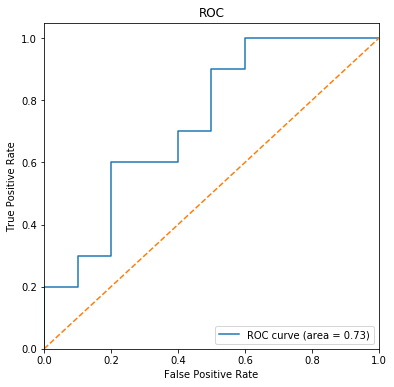

In [18]:
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")

# 교재 여기까지 ----------

## 3명의 능력 비교

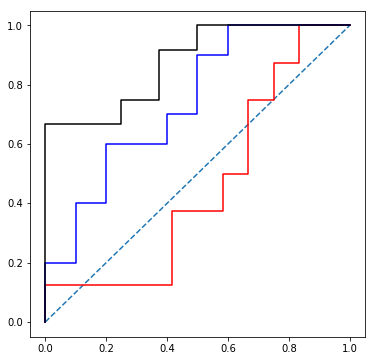

In [12]:
y_real=[[1,0,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0,0],
        [1,1,0,1,1,0,1,1,0,0,1,0,1,1,0,1,0,0,0,0],
        [1,1,1,1,1,1,1,1,0,0,1,0,1,1,0,1,0,0,0,0]]

plt.figure(figsize=(6,6))    
fpr = dict()
tpr = dict()
plt.plot([0, 1], [0, 1], linestyle='--')

my_color = ['r', 'b', 'k']
for i in range(3):
    fpr, tpr, _ = roc_curve(y_real[i], y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, c=my_color[i])